# Tutorial 01: Descriptive statistics and t-tests

## Task 1: Descriptive Statistics of the *Film* data set

Using appropriate descriptive statistics, describe the *Film* data set

In [2]:
# import pandas library and load the data set
import pandas as pd
film = pd.read_csv("../Data/film.csv").drop("Unnamed: 0", axis=1)

In [3]:
# show first 5 obs.
film.head()

,Man,Movie,fMan,fMovie
0,0,5,woman,highly negative
1,0,5,woman,highly negative
2,1,2,man,positive
3,0,2,woman,positive
4,0,4,woman,negative


Because all the categorical variables are coded into numeric values, I use only the latter to create the
descriptive stats

In [4]:
# all
film.select_dtypes(include="number").describe()

,Man,Movie
count,1322.000000,1322.000000
mean,0.444024,3.149017
std,0.497045,1.115456
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,3.000000
75%,1.000000,4.000000
max,1.000000,5.000000


In [5]:
# grouped by Man variable
film.groupby("Man").describe().transpose()

Man                   0           1
Movie count  735.000000  587.000000
      mean     3.251701    3.020443
      std      1.125888    1.089631
      min      1.000000    1.000000
      25%      2.000000    2.000000
      50%      3.000000    3.000000
      75%      4.000000    4.000000
      max      5.000000    5.000000

It might be also useful to visualize the results:

<AxesSubplot:xlabel='fMovie', ylabel='Count'>

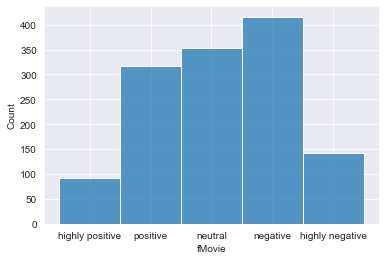

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(film.sort_values("Movie"), x="fMovie")

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

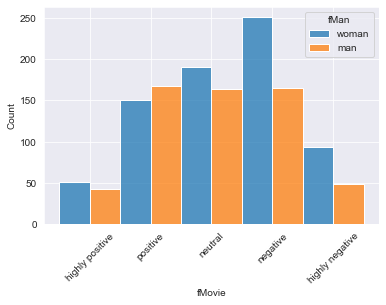

In [7]:
sns.histplot(film.sort_values("Movie"), x="fMovie", hue="fMan", multiple="dodge")
plt.xticks(rotation=45)

## Task 2 Descriptive Statistics of the *Marriage* data set

In [8]:
# load the data set
marriage = pd.read_csv("../Data/h_marriage.csv").drop("Unnamed: 0", axis=1)

In [9]:
# show first 5 rows
marriage.head()

,ownhh,getmar
0,2,4
1,2,5
2,3,3
3,1,3
4,2,3


In [10]:
# descriptive stats
marriage.describe()

,ownhh,getmar
count,1346.000000,1346.000000
mean,2.348440,3.149331
std,1.147028,1.407622
min,1.000000,1.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,3.000000,4.000000
max,5.000000,5.000000


In [11]:
# convert the data set to the long format (to plot distributions side by side
melt_mar = marriage.reset_index().melt(['index']).sort_values("index")
melt_mar.head(15)

,index,variable,value
0,0,ownhh,2
1346,0,getmar,4
1347,1,getmar,5
1,1,ownhh,2
2,2,ownhh,3
1348,2,getmar,3
3,3,ownhh,1
1349,3,getmar,3
4,4,ownhh,2
1350,4,getmar,3


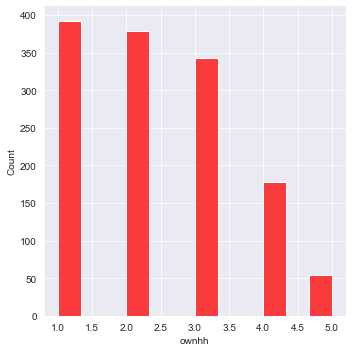

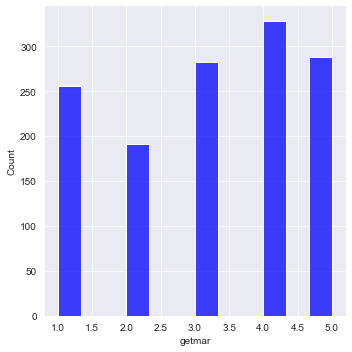

In [12]:
fig = sns.displot(marriage['ownhh'], color="r")
fig = sns.displot(marriage['getmar'], color="b")
plt.show()

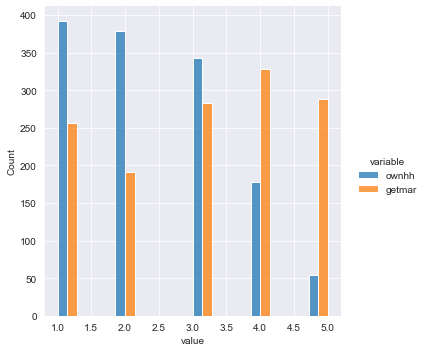

In [13]:
sns.displot(melt_mar, x="value", hue="variable", multiple="dodge")

We may see that both distributions differ. It might be interesting to see the correlation of the two variables:

In [24]:
from scipy import stats

In [25]:
r_pearson, p_val = stats.pearsonr(marriage['ownhh'], marriage['getmar'])
print(f"Correlation is {r_pearson} \nP_value of the zero correlation test is {p_val: .4f}")

Correlation is 0.08056845733470659 
P_value of the zero correlation test is  0.0031


## Task 3: T-tests of the *film* data set

In [16]:
# first 10 obs.
film.head(10)

,Man,Movie,fMan,fMovie
0,0,5,woman,highly negative
1,0,5,woman,highly negative
2,1,2,man,positive
3,0,2,woman,positive
4,0,4,woman,negative
5,1,4,man,negative
6,0,4,woman,negative
7,0,4,woman,negative
8,0,3,woman,neutral
9,0,4,woman,negative


In [17]:
# get mean ratings grouped by Man variable
film.select_dtypes('number').groupby('Man').mean().rename(columns={"Movie": 'Mean rating'})

,Mean rating
Man,
0,3.251701
1,3.020443


In [31]:
def compute_ttest(data, var, groupvar, val0, val1):
    """
    Compute t test for two independent samples
    :param data: original dat set
    :param var: variable to compare the means
    :param groupvar: grouping variable
    :param val0: value of var for the first category
    :param val1: value of var for the second category
    :return: tuple of arrays: t satatistic + p value
    """
    t, p_val = stats.ttest_ind(data.loc[data[groupvar]==val0][[var]], data.loc[data[groupvar]==val1][[var]])
    print(f't_stat value is: {t[0]: .3f} \np_value is: {p_val[0]: .5f}')
    return t, p_val

In [32]:
compute_ttest(film, 'Movie', 'Man', 1, 0)

t_stat value is: -3.764 
p_value is:  0.00017


(array([-3.76395657]), array([0.00017459]))

We may see that means differ when conditioned on Sex. But are they statistically significant?

The null hypothesis of the equality of means can be rejected. Unfortunately, the none of the standard pyton libraries offers to
compute the CI for the Welch's t-test directly. One would have to write his custom implementation which I find unnecessary in
this case.

## Task 04

In [33]:
educ = pd.read_csv("../Data/h_education.csv").drop('Unnamed: 0', axis=1)
educ.head()

,ownhh,degree,fdegree,fdegree4
0,1,0,<HS,<HS
1,1,0,<HS,<HS
2,1,0,<HS,<HS
3,1,0,<HS,<HS
4,1,0,<HS,<HS


In [34]:
educ_levels = educ.fdegree.unique()

In [41]:
from itertools import product
combinations = [i for i in product(educ_levels, educ_levels)]

In [42]:
for elem in combinations:
    if elem[0] != elem[1]:
        print(f"{elem}\n")
        tmp = compute_ttest(educ, 'ownhh', 'fdegree',elem[0], elem[1])
        print()


('<HS', 'HS')

t_stat value is: -0.558 
p_value is:  0.57677

('<HS', 'JC')

t_stat value is:  1.173 
p_value is:  0.24186

('<HS', 'BA')

t_stat value is:  1.928 
p_value is:  0.05455

('<HS', 'Grad')

t_stat value is:  1.969 
p_value is:  0.04993

('HS', '<HS')

t_stat value is:  0.558 
p_value is:  0.57677

('HS', 'JC')

t_stat value is:  1.791 
p_value is:  0.07368

('HS', 'BA')

t_stat value is:  3.011 
p_value is:  0.00267

('HS', 'Grad')

t_stat value is:  2.672 
p_value is:  0.00768

('JC', '<HS')

t_stat value is: -1.173 
p_value is:  0.24186

('JC', 'HS')

t_stat value is: -1.791 
p_value is:  0.07368

('JC', 'BA')

t_stat value is:  0.433 
p_value is:  0.66504

('JC', 'Grad')

t_stat value is:  0.699 
p_value is:  0.48547

('BA', '<HS')

t_stat value is: -1.928 
p_value is:  0.05455

('BA', 'HS')

t_stat value is: -3.011 
p_value is:  0.00267

('BA', 'JC')

t_stat value is: -0.433 
p_value is:  0.66504

('BA', 'Grad')

t_stat value is:  0.359 
p_value is:  0.71970

('Grad', 

In [ ]:

for elem in educ_levels:
    print(elem)

In [ ]:
import pingouin as pg
anova = pg.anova(data=educ, dv="ownhh", between="fdegree4", detailed=True)
print(anova)

In [ ]:
tukey = pg.pairwise_tukey(data=educ, dv="ownhh", between="fdegree4")